# About:

This notebook 

* loads prediction created by the trained model for image `['000009', '000013', '000015', '000039']` of VOC2007 

* and invoke the function `decode_prediction` to interpret this prediction into bounding boxes. 

The drawing functionalities is provided by class `DetectionVisualization` in `tools/visualization.py`


In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os

from model.model_utils import decode_prediction
from tools.visualization import DetectionVisualization

# Load Prediction from file

In [2]:
prediction = torch.load('voc07_prediction_for_images_09-13-15-39.pt')
print("prediction's size: ", prediction.size())

prediction's size:  torch.Size([4, 24, 96, 96])


The `prediction` is generated for 4 images therefore it is a 4D tensor of size `[4, 24, 96, 96]`. This meaning of these dimension

* 4: batch size. Indexing along this dimesion gives you prediction for an image in the batch. For example, `prediction[0]` (size: `[24, 96, 96]`) is the prediction for the 1st image in the batch

* 24: the number of channels of the prediction for a particular image. Among these 24 channels, 

    * The first 20 channels (index 0 to 19) are heat map. 
    
    * The next two (index 20 & 21) are `width` map and `size` map. 
    
    * The last two (index 22 & 23) are `offset_x` map and `offset_y` map.

* (96, 96): is the Height and Width of each channel in the `prediction`.

# Display images & predicted heat maps

**!!! Remember to adapt the value of  `image_dir` below to the location of dataset on your computer** 

In [3]:
# get full path to images for whom prediction is generated
image_dir = '/home/user/dataset/pascal-voc/VOC2007/JPEGImages'
image_names = ['000009', '000013', '000015', '000039']
image_names = [os.path.join(image_dir, "{}.jpg".format(name)) for name in image_names]

for image in image_names:
    assert os.path.exists(image), "Image doesn't exist at {}".format(image) + \
        ", have you set the correct value for image_dir?"

## Create visualizer

In [4]:
visualizer = DetectionVisualization()

## Draw images & heat maps

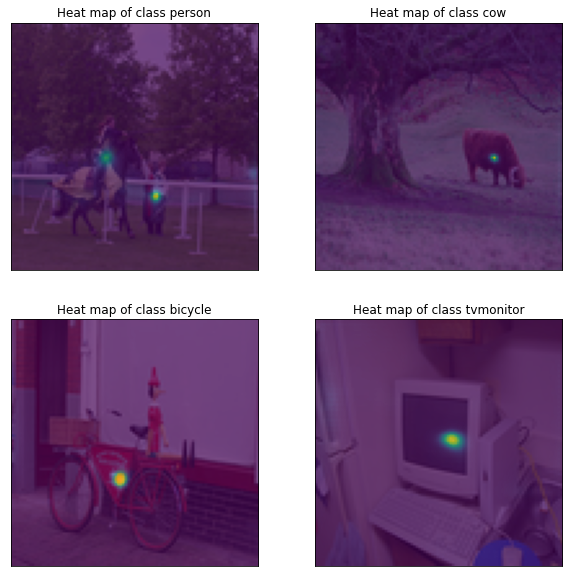

In [5]:
target_objects = ['person', 'cow', 'bicycle','tvmonitor']
fig, axe = plt.subplots(2, 2, figsize=(10, 10))
visualizer.draw_images(image_names, axe)
visualizer.draw_heatmap(prediction[:, :20], axe, target_objects)
for c in range(2):
    for r in range(2):
        axe[r, c].set_xticks([])
        axe[r, c].set_yticks([])
        axe[r, c].set_title("Heat map of class {}".format(target_objects[2*r + c]))
        

# Display decoded bounding boxes

In [6]:
batch_boxes = decode_prediction(prediction)

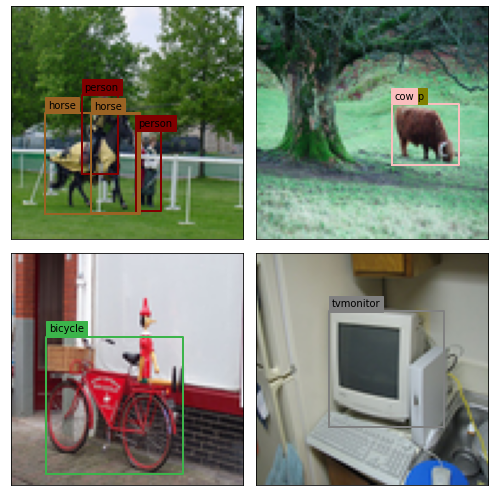

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
visualizer.draw_images(image_names, axes)
visualizer.draw_prediction(batch_boxes, axes)

for r in range(2):
    for c in range(2):
        axes[r, c].set_xticks([])
        axes[r, c].set_yticks([])

fig.tight_layout()